In [1]:
pip install vector


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import exists
from typing import Union, List
from hist import Hist
from hist.intervals import clopper_pearson_interval
import vector

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import hist
import mplhep as hep

hep.style.use(["CMS", "firamath"])

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"


import sys

In [3]:
def check_selector(sample: str, selector: Union[str, List[str]]):
    if isinstance(selector, list) or isinstance(selector, tuple):
        for s in selector:
            if s.startswith("*"):
                
                if s[1:] in sample:
                    return True
            else:
                if sample.startswith(s):
                    return True

    else:
        if selector.startswith("*"):
            if selector[1:] in sample:
                return True
        else:
            if sample.startswith(selector):
                return True

    return False

In [4]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [96]:
pip install awkward-pandas

Note: you may need to restart the kernel to use updated packages.


In [97]:
import uproot
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Step 1: Read the ROOT file
file = uproot.open("/Users/gbibim/Here/genparticleZ/Zto2Q-4Jets_HT-400to600.root")
tree = file["Events"]  # Replace "tree_name" with the actual name of the tree
df = tree.arrays(library="pd")

# Step 2: Convert to Pandas DataFrame (if not already in that format)
# (This step is implicitly done by the 'arrays' method with 'library="pd"')

# Step 3: Write to Parquet file
table = pa.Table.from_pandas(df)
pq.write_table(table, "output_file.parquet")

In [102]:
table = pq.read_table("output_file.parquet")

# Convert to Pandas DataFrame if needed
#df = table.to_pandas()

#print(df.head())

In [122]:
table

pyarrow.Table
run: uint32
luminosityBlock: uint32
event: uint64
bunchCrossing: uint32
HTXS_njets25: uint8
HTXS_njets30: uint8
HTXS_stage1_1_cat_pTjet25GeV: int32
HTXS_stage1_1_cat_pTjet30GeV: int32
HTXS_stage1_1_fine_cat_pTjet25GeV: int32
HTXS_stage1_1_fine_cat_pTjet30GeV: int32
HTXS_stage1_2_cat_pTjet25GeV: int32
HTXS_stage1_2_cat_pTjet30GeV: int32
HTXS_stage1_2_fine_cat_pTjet25GeV: int32
HTXS_stage1_2_fine_cat_pTjet30GeV: int32
HTXS_stage_0: int32
HTXS_stage_1_pTjet25: int32
HTXS_stage_1_pTjet30: int32
HTXS_Higgs_pt: float
HTXS_Higgs_y: float
BeamSpot_type: int8
BeamSpot_sigmaZ: float
BeamSpot_sigmaZError: float
BeamSpot_z: float
BeamSpot_zError: float
nboostedTau: int32
boostedTau_idAntiEle2018: extension<awkward<AwkwardArrowType>>
boostedTau_idAntiMu: extension<awkward<AwkwardArrowType>>
boostedTau_idMVAnewDM2017v2: extension<awkward<AwkwardArrowType>>
boostedTau_idMVAoldDM2017v2: extension<awkward<AwkwardArrowType>>
boostedTau_jetIdx: extension<awkward<AwkwardArrowType>>
boostedTa

In [127]:
print(table["genEventSumw"])

KeyError: 'Field "genEventSumw" does not exist in schema'

In [6]:
table = pa.read_table('/Users/gbibim/Here/genparticleZ/2022/Zto2Q-4Jets_HT-400to600/parquet/out_0.parquet') 
table


pyarrow.Table
('GenVEta', '0'): float
('GenVPhi', '0'): float
('GenVMass', '0'): float
('GenVPt', '0'): float
('FatJetVMatch', '0'): int64
('FatJetVMatch', '1'): int64
('ak8FatJetEta', '0'): double
('ak8FatJetEta', '1'): double
('ak8FatJetPhi', '0'): double
('ak8FatJetPhi', '1'): double
('ak8FatJetMass', '0'): double
('ak8FatJetMass', '1'): double
('ak8FatJetPt', '0'): double
('ak8FatJetPt', '1'): double
('ak8FatJetmsoftdrop', '0'): double
('ak8FatJetmsoftdrop', '1'): double
('ak8FatJetPNetTXbb', '0'): double
('ak8FatJetPNetTXbb', '1'): double
('ak8FatJetPNetTXjj', '0'): double
('ak8FatJetPNetTXjj', '1'): double
('ak8FatJetPNetQCD', '0'): double
('ak8FatJetPNetQCD', '1'): double
('ak8FatJetPNetQCD1HF', '0'): double
('ak8FatJetPNetQCD1HF', '1'): double
('ak8FatJetPNetQCD2HF', '0'): double
('ak8FatJetPNetQCD2HF', '1'): double
('ak8FatJetPNetQCD0HF', '0'): double
('ak8FatJetPNetQCD0HF', '1'): double
('ak8FatJetparticleNet_mass', '0'): double
('ak8FatJetparticleNet_mass', '1'): double
('ak

In [ ]:
print events(columns)

In [39]:
data_dir = "/Users/gbibim/Here/genparticleZ"
y = "2022"
samples = {
    "2022": {
        "Zto2Q-4Jets": ["Zto2Q-4Jets_HT-400to600", "Zto2Q-4Jets_HT-600to800", "Zto2Q-4Jets_HT-800", "Zto2Q-4Jets_HT-200to400"],
    },
}[y]


# dictionary that will contain all information (from all samples)
full_samples_list = listdir(f"{data_dir}/{y}/")
#print(full_samples_list)
events_dict = {}
for label, selector in samples.items():
    #label = Zto2Q-4Jets
    #selector = a tal da lista de samples
    #print(events_dict[label])
    #print(label)
    #print(selector)
    
    #for sample in full_samples_list:
    for sample in selector:
        events_dict[sample] = []
        if not check_selector(sample, selector):
            continue
        if not exists(f"{data_dir}/{y}/{sample}/parquet"):
            print(f"No parquet file for {sample}")
            continue


        events = pd.read_parquet(f"{data_dir}/{y}/{sample}/parquet", columns=None)
        not_empty = len(events) > 0
        if not_empty:
            events_dict[sample].append(events)
        print(f"Loaded {sample: <50}: {len(events)} entries")
        #print(sample)


    #print(label)
    #print(selector)


    #if len(events_dict[selector]):
    #    events_dict[label] = pd.concat(events_dict[label])

    #else:
    #    del events_dict[label]

#events_dict[ztopiriri]

Loaded Zto2Q-4Jets_HT-400to600                           : 231480 entries
Loaded Zto2Q-4Jets_HT-600to800                           : 1493376 entries
Loaded Zto2Q-4Jets_HT-800                                : 1925423 entries
Loaded Zto2Q-4Jets_HT-200to400                           : 426 entries


In [56]:
#print(list(events["GenVEta"][0].to_numpy()))
events[0]


GenVEta   GenVPhi GenVMass  GenVPt FatJetVMatch        ak8FatJetEta  \
               0         0        0       0            0      1            0   
0      -0.861328 -1.808594    90.75  206.00            0      1     0.199188   
1      -1.683594 -2.765625    90.75  252.00            1      0    -1.662354   
2       0.582031  0.363281    93.25  189.50            0      1    -0.993774   
3      -2.781250 -2.562500    91.25  112.75            0 -99999     1.744873   
4       0.355469  1.960938    91.75  297.00            1      0     0.307373   
...          ...       ...      ...     ...          ...    ...          ...   
231475 -1.089844  1.144531    90.75  262.00            1 -99999    -1.093018   
231476 -0.014160  2.085938    92.75  265.00            0      1     1.472656   
231477  2.671875  0.088135    94.50  239.50            0      1     1.130859   
231478  2.515625 -2.625000    86.50  200.50            0      1     2.211914   
231479  1.664062 -0.490234    91.50  203.00            0 -99999     1.549805   

                     ak8FatJetPhi                ...  \
                   1            0             1  ...   
0          -0.964844     1.634521     -1.818848  ...   
1           0.834717    -2.799316      0.447144  ...   
2           0.549927    -3.107422      0.224823  ...   
3      -99999.000000     1.083008 -99999.000000  ...   
4           0.256348     1.941650     -0.880249  ...   
...              ...          ...           ...  ...   
231475 -99999.000000     1.141846 -99999.000000  ...   
231476      0.038406    -1.110352      2.004395  ...   
231477      2.653320    -3.079102      0.118683  ...   
231478      2.438965     0.526978     -2.674805  ...   
231479 -99999.000000     2.717285 -99999.000000  ...   

       AK8PFJet425_SoftDropMass40 AK8PFJet400_SoftDropMass40  \
                                0                          0   
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
231475                          0                          0   
231476                          0                          0   
231477                          0                          0   
231478                          0                          0   
231479                          0                          0   

       AK8DiPFJet250_250_MassSD50 AK8DiPFJet260_260_MassSD30  \
                                0                          0   
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
231475                          0                          0   
231476                          0                          0   
231477                          0                          0   
231478                          0                          0   
231479                          0                          0   

       AK8PFJet420_MassSD30 AK8PFJet230_SoftDropMass40_PNetBB0p06  \
                          0                                     0   
0                         0                                 False   
1                         0                                 False   
2                         0                                 False   
3                         0                                 False   
4                         0                                 False   
...                     ...                                   ...   
231475               

In [18]:
print (events.columns)

MultiIndex([(                                            'GenVEta', 0),
            (                                            'GenVPhi', 0),
            (                                           'GenVMass', 0),
            (                                             'GenVPt', 0),
            (                                       'FatJetVMatch', 0),
            (                                       'FatJetVMatch', 1),
            (                                       'ak8FatJetEta', 0),
            (                                       'ak8FatJetEta', 1),
            (                                       'ak8FatJetPhi', 0),
            (                                       'ak8FatJetPhi', 1),
            (                                      'ak8FatJetMass', 0),
            (                                      'ak8FatJetMass', 1),
            (                                        'ak8FatJetPt', 0),
            (                                        'ak8FatJetP

In [9]:
trigger_dict = {
    "Combined": (
        [
            "AK8PFJet230_SoftDropMass40",
        ],
        "label",
    ),
}

In [174]:
# ht_bins_fine = (25, 200, 3000)
ht_bins_fine = (25, 200, 2000)
#fjpt_axis = hist.axis.Regular(100, 0, 1000, name="pt", label=r"Z pT$^0$ [GeV]") #!!!
fjpt_axis = hist.axis.Regular(100, 200, 1000, name="pt", label=r"fj pT$^0$ [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)
sample_axis = hist.axis.StrCategory([], name="sample_name", growth=True)

hpt = hist.Hist(fjpt_axis, cat_axis, sample_axis)

for sample in events_dict.keys():
    events = events_dict[sample][0]
    #pt_0 = events["GenVPt"][0]
    pt_0 = events["ak8FatJetPt"][0]
    SDm = events["ak8FatJetmsoftdrop"][0]
    wd = events["weight"][0]
    #selection = (pt_0 > 0)
    selection = SDm > 40


    hpt.fill(pt=pt_0[selection], cat="denominator", sample_name=sample, weight=wd[selection])

    hpt.fill(pt=pt_0[selection], cat="denominator", sample_name="todas", weight=wd[selection])
    for trigger_title, (triggers, trigger_label) in trigger_dict.items():
        trigger_selection = np.zeros_like(selection)
        for hlt in triggers:
            trigger_selection |= (events[hlt].values == 1).squeeze()
        num_selection = trigger_selection
        hpt.fill(pt=pt_0[num_selection & selection], cat=trigger_title, sample_name=sample, weight=wd[num_selection & selection])
        hpt.fill(pt=pt_0[num_selection & selection], cat=trigger_title, sample_name="todas", weight=wd[num_selection & selection])

    #print (categ)


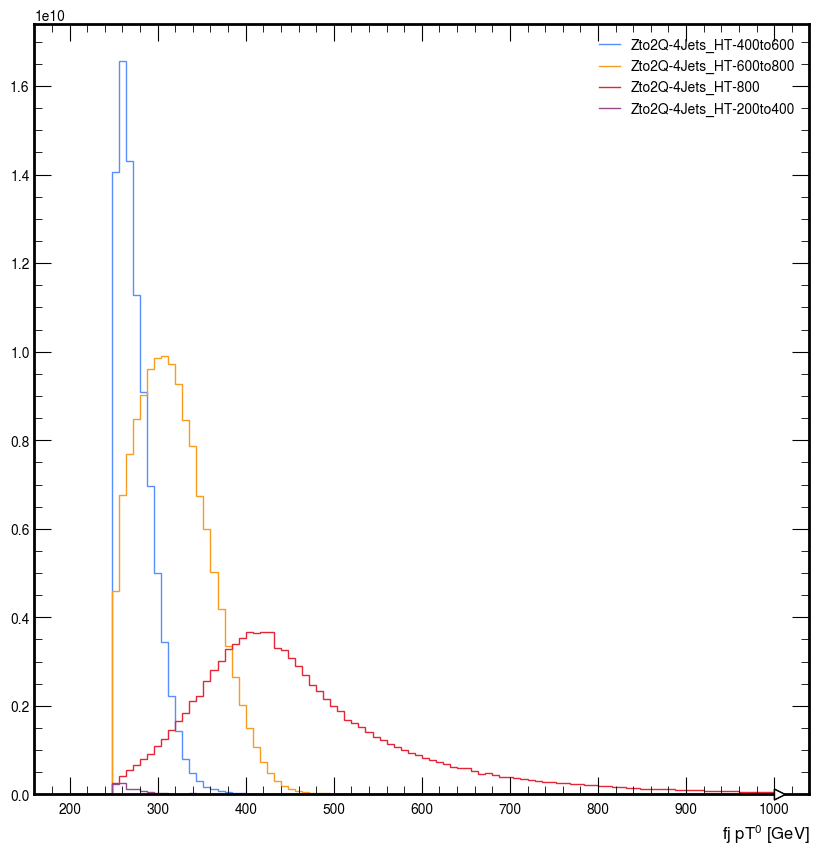

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for sample in events_dict.keys():
    hep.histplot(hpt[{"cat": "denominator", "sample_name": sample}],  ax=ax, label=sample)
    ax.legend()



[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x460d85c70>, errorbar=None, legend_artist=None)]

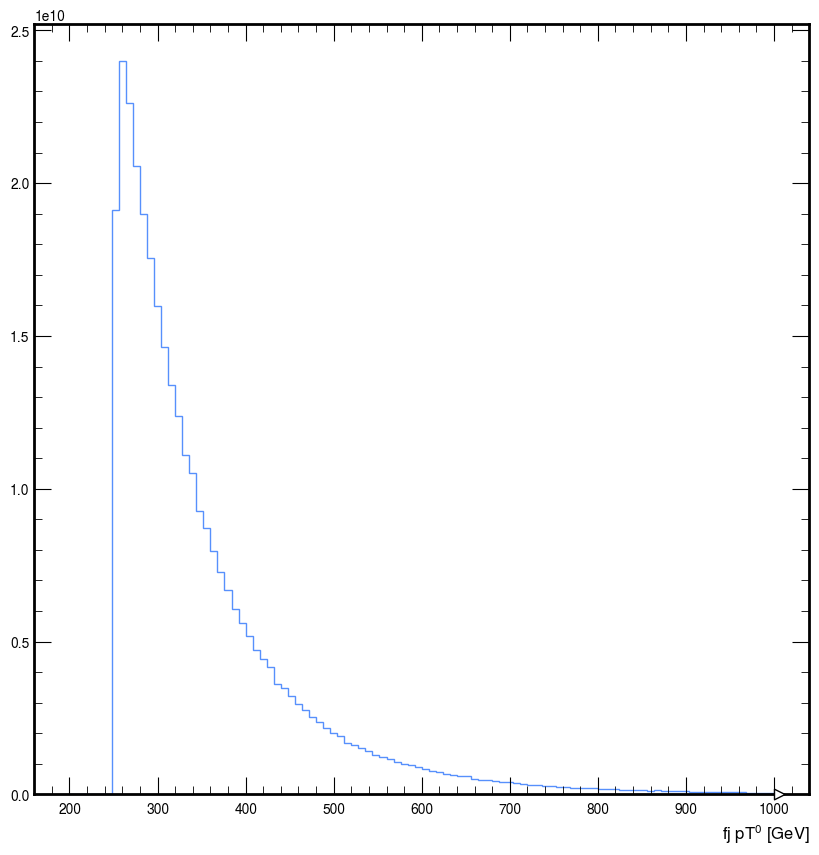

In [176]:
hep.histplot(hpt[{"cat": "denominator", "sample_name": "todas"}])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1507887a0>, errorbar=None, legend_artist=None)]

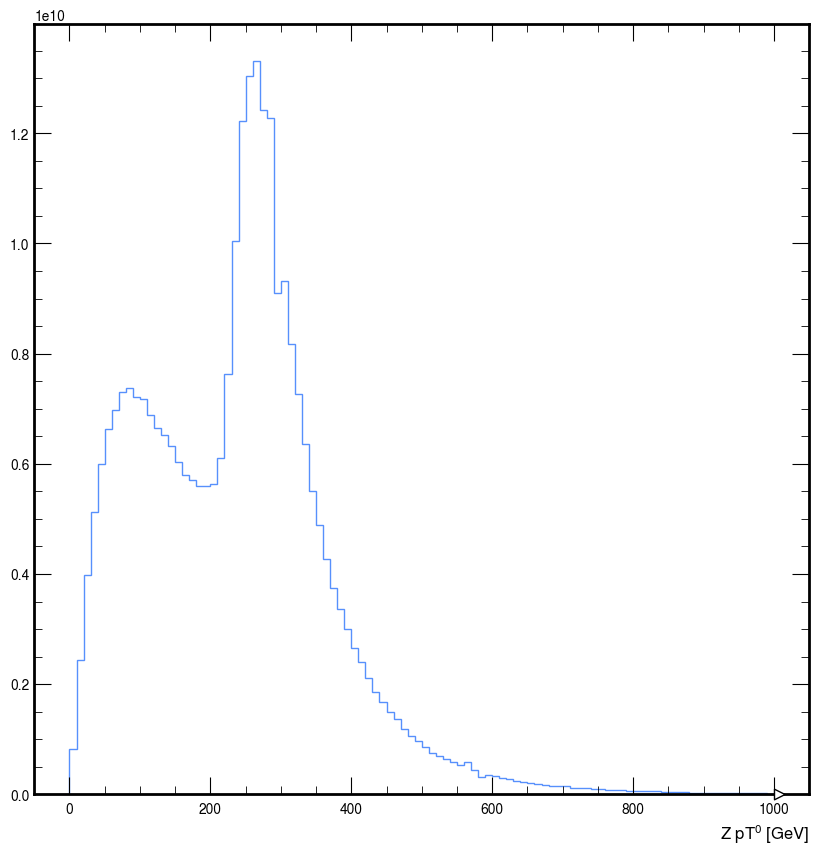

In [171]:
hep.histplot(hpt[{"cat": trigger_title, "sample_name": "todas"}])

In [20]:
print(trigger_title)

Combined


dict_items([('Combined', (['AK8PFJet230_SoftDropMass40'], 'label'))])
Combined


/var/folders/5l/g72gr7pn1qjfpv9ts3r8m3x80000gn/T/ipykernel_62382/1944514583.py:14: RuntimeWarning: invalid value encountered in divide
  yerr=abs(clopper_pearson_interval(num.view(), den.view()) - num.view() / den.view()),
/var/folders/5l/g72gr7pn1qjfpv9ts3r8m3x80000gn/T/ipykernel_62382/1944514583.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = ax.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left")
/var/folders/5l/g72gr7pn1qjfpv9ts3r8m3x80000gn/T/ipykernel_62382/1944514583.py:43: RuntimeWarning: invalid value encountered in divide
  yerr=abs(clopper_pearson_interval(num.view(), den.view()) - num.view() / den.view()),
/var/folders/5l/g72gr7pn1qjfpv9ts3r8m3x80000gn/T/ipykernel_62382/1944514583.py:43: RuntimeWarning: invalid value encountered in divide
  yerr=abs(clopper_pearson_interval(num.view(), den.view()) - num.view() / den.view()),
/var

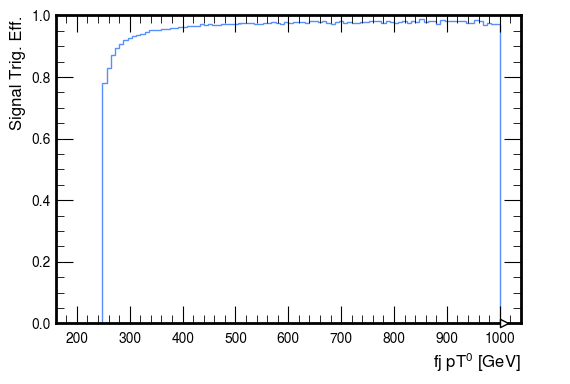

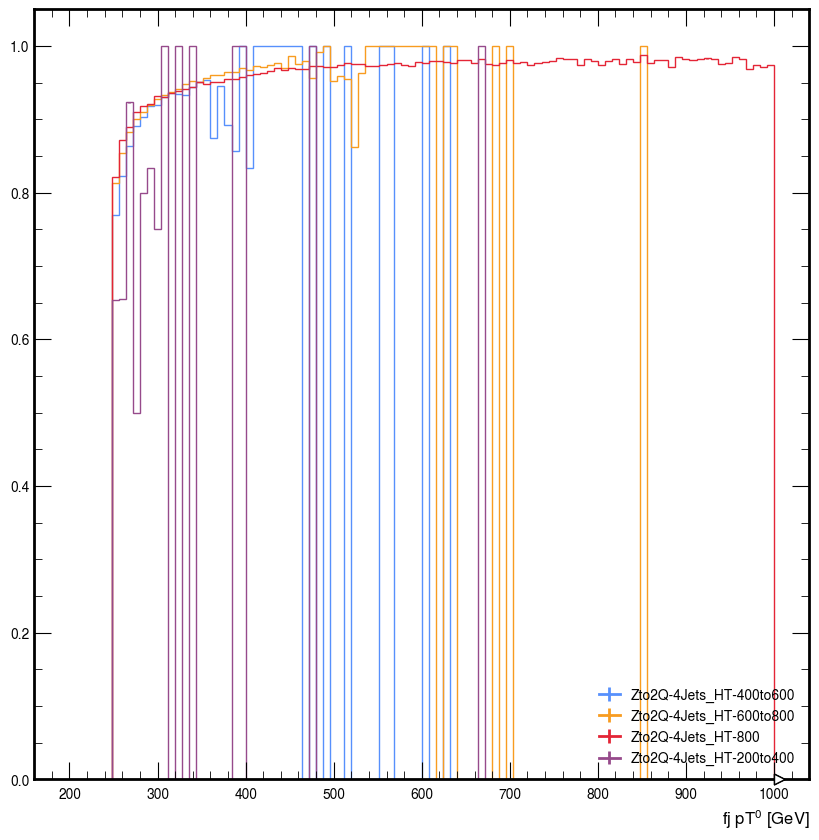

In [178]:
def plot_1d(hist_to_plot, sample, sample_label):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    for trigger_title, (triggers, trigger_label) in trigger_dict.items():
        print (trigger_dict.items())
        print(trigger_title)
        #print(trigger_lable)

        #den = hist_to_plot[{"cat": "denominator", "sample_name": sample}]
        #num = hist_to_plot[{"cat": trigger_title, "sample_name": sample}]
        den = hist_to_plot[{"cat": "denominator", "sample_name": "todas"}]
        num = hist_to_plot[{"cat": trigger_title, "sample_name": "todas"}]
        hep.histplot(
            num / den,
            yerr=abs(clopper_pearson_interval(num.view(), den.view()) - num.view() / den.view()),
            #label=trigger_label,
            #ax=ax,
            #flow="none",
        )
        

    leg = ax.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set_ylabel("Events")
    #leg.set_title(f"{sample_label} no selection", prop={"size": 10})
    ax.set_ylabel("Signal Trig. Eff.")
    ax.set_ylim(0, 1)


to_plot = [
    #("Zto2Q-4Jets", "GenVPt"),
    ("Zto2Q-4Jets", "ak8FatJetPt"),
]
for sample, sample_label in to_plot:

    plot_1d(hpt, sample, sample_label)


fig, ax = plt.subplots()
for sample in events_dict.keys():
    den = hpt[{"cat": "denominator", "sample_name": sample}]
    num = hpt[{"cat": trigger_title, "sample_name": sample}]
    hep.histplot(
    num / den,
    yerr=abs(clopper_pearson_interval(num.view(), den.view()) - num.view() / den.view()),
    label=sample,
    ax=ax,
    #flow="none",
    )
    ax.legend()